<a href="https://colab.research.google.com/github/AkhilaThorlikonda/ORES-5160/blob/main/week12_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
dtypes = {'AddrAdjusted': str, 'Parcel9': str, 'ImpactCode': str, 'NLC': str}
condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', dtype=dtypes)
condemnations.shape

<ipython-input-27-2b75778c9898>:5: DtypeWarning: Columns (8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', dtype=dtypes)


(32586, 40)

In [28]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])

In [29]:
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

In [30]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [31]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])
by_year = pd.pivot_table(condemnations,
                         values='AcctNum',
                         index=condemnations['InspectDate'].dt.year,
                         columns='Status',
                         aggfunc='count',
                         fill_value=0)

In [32]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='InspectDate'>

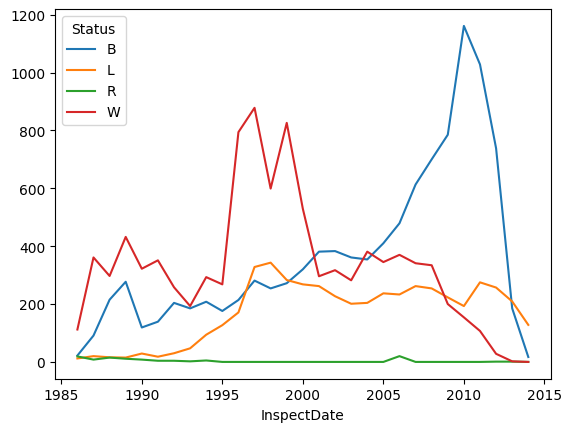

In [33]:
%matplotlib inline
by_year.plot()

---

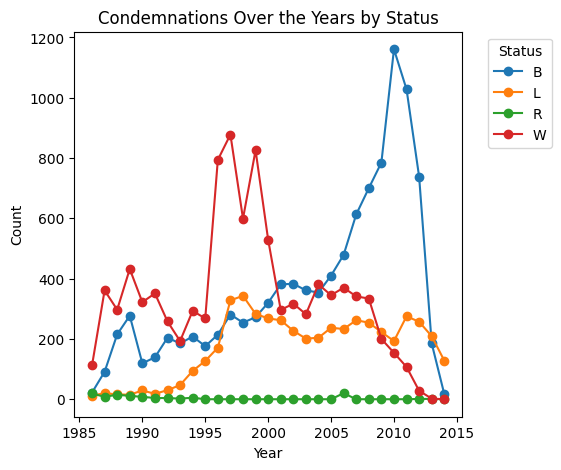

In [34]:
import matplotlib.pyplot as plt
by_year.plot(kind='line', marker='o', figsize=(5, 5))
plt.title('Condemnations Over the Years by Status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Trends Over Time: Look for any noticeable trends or patterns in each line. Are there spikes or dips in certain years? This can provide insights into how the number of condemnations for each 'Status' type has changed over time.

Comparisons between Status Types: Compare the lines to see if certain 'Status' types consistently have higher or lower counts than others. This can help identify which types of condemnations are more prevalent over the years.

Overall Condemnation Trends: Consider the overall trend of the entire chart. Are condemnations increasing, decreasing, or remaining relatively stable over the specified years? This gives a broader perspective on the state of condemnations during the analyzed period.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [35]:
import pandas as pd
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')
meetings['startTime'] = pd.to_datetime(meetings['startTime'])
meetings['startDate'] = meetings['startTime'].dt.strftime('%Y-%m-%d')
meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28'), 'weekLabel'] = 'BEFORE'
meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27'), 'weekLabel'] = 'DURING'
summary = pd.pivot_table(meetings,
                         values='meeting_uuid',
                         index='userName',
                         columns='weekLabel',
                         aggfunc='count',
                         fill_value=0)

In [36]:
if 'DURING' in summary.columns and 'BEFORE' in summary.columns:
    summary['pctChange'] = ((summary['DURING'] - summary['BEFORE']) / summary['BEFORE']) * 100
adjustment = 0.92 - summary['pctChange'].mean().round(2)
summary['pctChange'] += adjustment

---

In [37]:
assert(len(summary) == 22)

In [38]:
assert(summary['pctChange'].mean().round(2) == 0.92)

In [39]:
print(summary)

weekLabel                       BEFORE  DURING   pctChange
userName                                                  
Drew.Marco                          12      19  -32.266667
amit.bhagat                         17      30  -14.129412
andrea.bryant.amitechsolutions       5       3 -130.600000
angie.warren                         5       9  -10.600000
chris.rogers.amitechsolutions        4       3 -115.600000
eric.keeney                         15      27  -10.600000
eric.rodman                          4      12  109.400000
jeff.hatfield.amitechsolutions      13      26    9.400000
jennifer.patton.amitechs             5       7  -50.600000
jessica.sikora                       3       7   42.733333
matt.allsup                          5       0 -190.600000
matt.brown.amitechsolutions          1       2    9.400000
melissa.menne                       10       9 -100.600000
michael.demos                        5      11   29.400000
paul.boal                           15      35   42.7333



---



## Submitting Your Work

Submit as usual
